<a href="https://colab.research.google.com/github/mrudulamadhavan/Mrudula_Scifor/blob/main/week%208/Naive%20Bayes%20-%20Scratch%20Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Naive Bayes Classifier - Scratch implementation**

### Introduction

Naive Bayes is a classification algorithm that is based on Bayes’ theorem. Bayes’ theorem states that the probability of an event is equal to the prior probability of the event multiplied by the likelihood of the event given some evidence. In the context of classification, this means that we are trying to find the class that is most likely given a set of features or attributes.

Naive Bayes assumes that the features are independent of each other, meaning that the presence or absence of one feature does not affect the presence or absence of another feature. This simplifies the calculation of the likelihood of the features, as we can calculate the likelihood of each feature separately and then multiply them together.

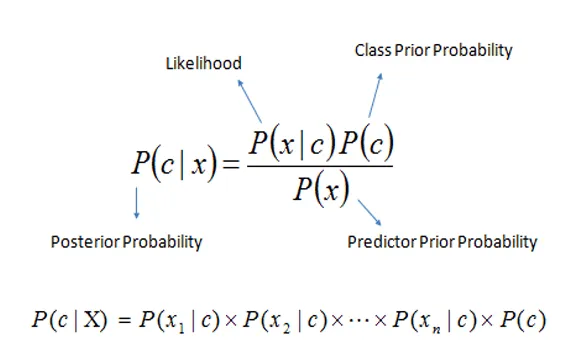

## **Implementation**

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [8]:
class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)


    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # return class with the highest posterior
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


# Testing
if __name__ == "__main__":
    # Imports
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    def visualize(self, y_true, y_pred, target):

        tr = pd.DataFrame(data=y_true, columns=[target])
        pr = pd.DataFrame(data=y_pred, columns=[target])


        fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,6))

        sns.countplot(x=target, data=tr, ax=ax[0], palette='viridis', alpha=0.7, hue=target, dodge=False)
        sns.countplot(x=target, data=pr, ax=ax[1], palette='viridis', alpha=0.7, hue=target, dodge=False)


        fig.suptitle('True vs Predicted Comparison', fontsize=20)

        ax[0].tick_params(labelsize=12)
        ax[1].tick_params(labelsize=12)
        ax[0].set_title("True values", fontsize=18)
        ax[1].set_title("Predicted values", fontsize=18)
        plt.show()

    X, y = datasets.make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=123)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [10]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)

print("Accuracy", accuracy(y_test, preds)*100,"%")

Accuracy 96.5 %
